# Question 1: Use the yfinance to Extract Stock Data

### Installing yfinance into the juypter notebook

In [36]:
import yfinance as yf
import pandas as pd

#### Download `Tesla` stock data

In [37]:
tesla_data = yf.download("TSLA", start="2010-01-01", end="2025-01-01")

C:\Users\haris\AppData\Local\Temp\ipykernel_20824\3052209451.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


### Rest the index

In [38]:
tesla_data.reset_index(inplace=True)

### Display first 5 rows

In [39]:
tesla_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


# Question 2: Use Webscraping to Extract Tesla Revenue Data

### To display the last five rows of the `tesla_data` DataFrame, use the `.tail()` function

In [40]:
tesla_data.tail()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
3647,2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
3648,2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
3649,2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
3650,2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000
3651,2024-12-31,403.839996,427.929993,402.540009,423.790009,76825100


# Question 3: Use yfinance to Extract Stock Data

 ### Download GME stock data

In [41]:
gme_data = yf.download("GME", start="2010-01-01", end="2025-01-01")

C:\Users\haris\AppData\Local\Temp\ipykernel_20824\2401429841.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


 ### Reset the index

In [42]:
gme_data.reset_index(inplace=True)

### Display the first `five rows`

In [43]:
gme_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2010-01-04,3.854643,3.863059,3.703150,3.714933,26702800
1,2010-01-05,3.959005,3.996037,3.854643,3.856327,21269600
2,2010-01-06,4.044849,4.056632,3.908506,3.948904,21471200
3,2010-01-07,3.443930,3.563441,3.268872,3.368184,164761200
4,2010-01-08,3.415315,3.573541,3.405216,3.474229,47872400


# Question 4: Use Webscraping to Extract GME Revenue Data

### importing necessary libs

In [44]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

### Fetch HTML from Macrotrends

In [45]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text
soup = BeautifulSoup(html, "html.parser")

### Find the revenue table

In [46]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

tables = soup.find_all("table")

for table in tables:
    if "Quarterly Revenue" in str(table):
        for row in table.tbody.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    gme_revenue = pd.concat(
                        [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                        ignore_index=True
                    )
        break

### Convert revenue to numeric

In [47]:
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

### Display last five rows

In [48]:
gme_revenue.tail()

,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


# Question 5: Plot Tesla Stock Graph

def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with Tesla data and a title
make_graph(tesla_data, "Tesla Stock Closing Prices Over Time")


# Question 6: Plot GameStop Stock Graph

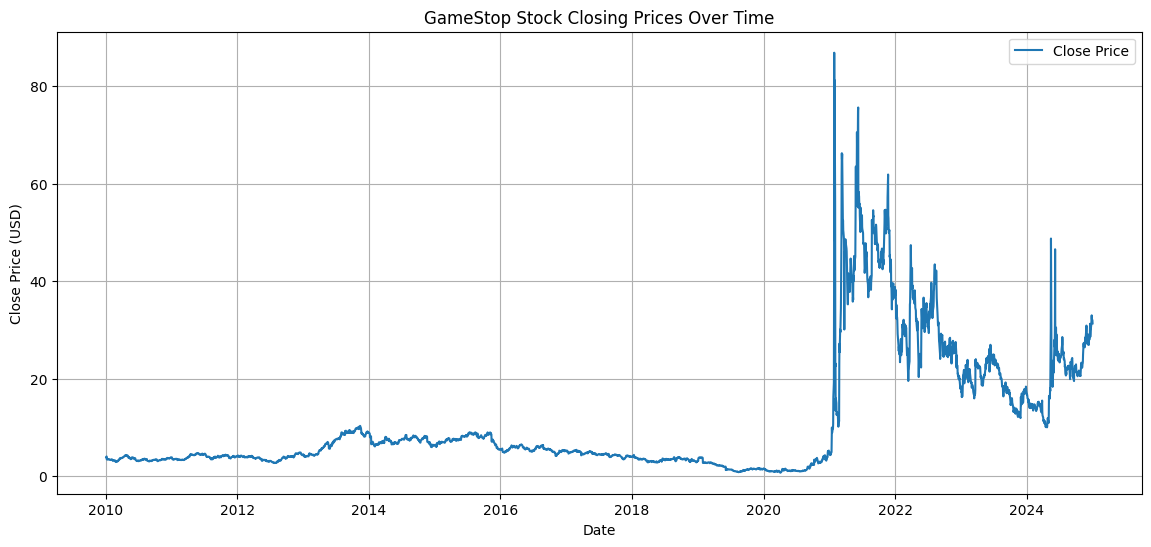

In [50]:
def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
make_graph(gme_data, "GameStop Stock Closing Prices Over Time")